<a href="https://colab.research.google.com/github/PraeJi/Handwritten_recognition/blob/main/handwritten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/biodatlab/deep-learning-skooldio/blob/master/student_notebooks/02_handwritten_recognition.ipynb)

## **Thai-digit handwritten classification with Pytorch**

This notebook contains a hands-on code for Deep learning class "Thai-digit handwritten classification with Pytorch" by Skooldio

## **Download and clean the dataset from the repository**

- We have downloaded the data from https://github.com/kittinan/thai-handwriting-number by cloning the repository
- Remove files that have character mismatch (as suggested by the the creator)
- Then, we put the cleaned data at https://github.com/biodatlab/deep-learning-skooldio

In [ ]:
!git clone https://github.com/biodatlab/deep-learning-skooldio

Cloning into 'deep-learning-skooldio'...
remote: Enumerating objects: 2064, done.
remote: Counting objects: 100% (358/358), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 2064 (delta 194), reused 253 (delta 129), pack-reused 1706
Receiving objects: 100% (2064/2064), 17.11 MiB | 22.40 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [ ]:
import os # os: Operating system interactions (file and directory manipulation).
import os.path as op # op: Alias for os.path, used for path-related operations.
import shutil # shutil: High-level file operations (copy, move, delete).
from glob import glob # glob: File and directory name pattern matching.
from pathlib import Path # pathlib.Path: Object-oriented file system path representation.
from tqdm.auto import tqdm # tqdm: Progress bars for tracking task completion.

In [ ]:
directory = "deep-learning-skooldio/"
paths = glob(op.join(directory, "thai-handwritten-dataset", "*", "*"))

In [ ]:
len(paths)

1750

In [ ]:
paths

**Important Note:**
- The ordering of the data may differ between the video demonstrations and this code.
- Your results may not match exactly with the results shown in the video.
- Don't worry if your results differ; focus on understanding the code and concepts.
- Continue with your learning journey and feel free to explore variations in the data.

In [ ]:
paths[0]

'deep-learning-skooldio/thai-handwritten-dataset/6/ae9006e5-764b-495c-ad9b-aea5df546eb9.png'

In [ ]:
# TODO: use Counter from collection to count the number, use Pathlib to get the parent folder name
from collections import Counter
Counter([Path(p).parent.name for p in paths])

Counter({'6': 175,
         '0': 175,
         '7': 175,
         '5': 175,
         '8': 175,
         '2': 175,
         '4': 175,
         '1': 175,
         '3': 175,
         '9': 175})

In [ ]:
# TODO: Use Pillow's Image to read and open one file
from PIL import Image

7


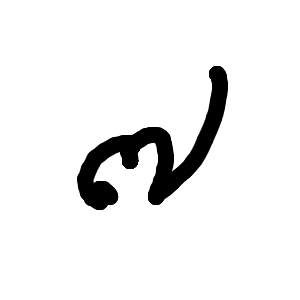

In [ ]:
idx =  400
print(Path(paths[idx]).parent.name)
Image.open(paths[idx])

In [ ]:
# TODO: Use train_test_split to split image into 90% training and 10% validation
from sklearn.model_selection import train_test_split

In [ ]:
train_paths,validation_paths = train_test_split(paths,test_size=0.1,random_state=42)

In [ ]:
len(train_paths),len(validation_paths)

(1575, 175)

In [ ]:
# Create directory
for i in range(10):
    os.makedirs(f"data/train/{i}", exist_ok=True)
    os.makedirs(f"data/validation/{i}", exist_ok=True)

In [ ]:
# Copy paths to directory
def copy_to_destination(src_paths, dst_path):
    """
    Copy list of src_paths to destination path ``dst_path``
    """
    for path in tqdm(src_paths):
        path = Path(path)
        parent_dir = path.parent.name
        shutil.copy(path, op.join(dst_path, parent_dir, path.name))

In [ ]:
copy_to_destination(train_paths, "data/train/")
copy_to_destination(validation_paths, "data/validation/")

  0%|          | 0/1575 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

In [ ]:
len(glob("data/train/*/*")), len(glob("data/validation/*/*"))

(1575, 175)

## **Create a custom dataset and a dataloader**

- We need 3 functions when creating a `Dataset` including `__init__` (typically contains input data and transform), `__len__` (length of the dataset), `__getitem__` (input index then return pair of input and label or input)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
# Create image transform
resize_transform = transforms.Resize((28,28))
grayscale_transform = transforms.Grayscale()
tensor_transform = transforms.ToTensor()

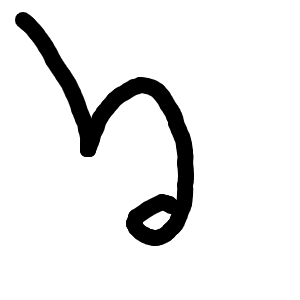

In [ ]:
img = Image.open(paths[100])
img

In [ ]:
img_tensor = tensor_transform(grayscale_transform(resize_transform(img)))
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
transform = transforms.Compose([
  transforms.Resize((28,28)),
  transforms.Grayscale(),
  transforms.ToTensor(),
])

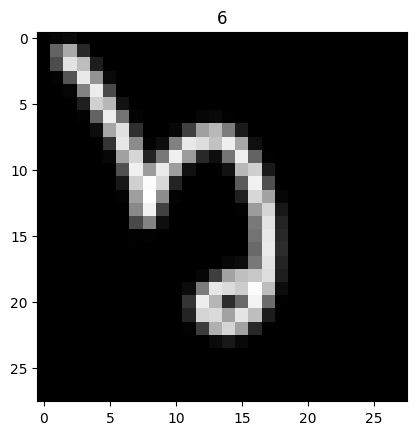

In [ ]:
# Show image transform
img_t = 1-transform(img).squeeze(0)
plt.imshow(img_t,cmap="gray")
plt.title(Path(paths[100]).parent.name)
plt.show()

In [ ]:
class ThaiDigitDataset(Dataset):
    def __init__(self, img_dir: str, transform=None):
        # TODO: Input img_dir, create a relatioship between image path and label
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = [(p, Path(p).parent.name) for p in glob(op.join(img_dir,"*","*"))]


    def __len__(self):
        # TODO: Find length of the dataset
        return len(self.img_labels)

    def __getitem__(self, idx):
        # TODO:
        image_path,label = self.img_labels[idx]
        label = int(label)
        image = Image.open(image_path)
        if self.transform is not None:
          image =  1-self.transform(image)
        return image,label

In [ ]:
# TODO: Create a Dataset and DataLoader
train_thaidigit_dataset = ThaiDigitDataset("data/train/",transform=transform)
validation_thaidigit_dataset = ThaiDigitDataset("data/validation/",transform=transform)

In [ ]:
train_thaidigit_dataset[10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0784, 0.1725, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.4039, 0.8824, 0.5451, 0.1569, 0.0118, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
train_loader = DataLoader(train_thaidigit_dataset,batch_size=16,shuffle=True)
val_loader = DataLoader(validation_thaidigit_dataset,batch_size=16,shuffle=False)

In [ ]:
# TODO: Use `next(iter(data_loader))` to load an example batch
images, labels = next(iter(train_loader))

In [ ]:
# TODO: Check the shape of the batch
images.shape,labels.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

## **Create the model**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ThaiDigitNet(nn.Module):
    def __init__(self):
        super(ThaiDigitNet, self).__init__()
        # TODO: Create Linear (Dense) Neural network layers
        self.fc1 = nn.Linear(28*28,100)
        self.fc2 = nn.Linear(100,10)

    def forward(self, x):
        # TODO: Write a forward pass
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# TODO: Try passing an input to the model
net = ThaiDigitNet()

In [ ]:
pred = net(images)

In [ ]:
pred.shape

torch.Size([16, 10])

In [ ]:
labels

tensor([7, 2, 4, 9, 1, 4, 8, 0, 3, 9, 7, 2, 0, 4, 3, 0])

In [ ]:
# TODO: Predict the digit from the model before training (the result should not be good yet since the model is not trained)
pred.argmax(dim=1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1])

## **Train the model**

**Note for loss function**
- `CrossEntropyLoss` computes the cross entropy loss between logits and target. So we don't need to apply softmax to the output of the model.
- This is equivalent to the combination of applying `LogSoftmax` at the last layer and use `NLLLoss` as a loss function.

In [ ]:
# TODO: Create cross entropy loss function, SGD optimizer, and its learning rate



In [ ]:
# TODO: Single pass model and calculate loss


In [ ]:
for epoch in range(n_epochs):
    # TODO: Write a training loop
    # TODO: Print the train loss every 100 steps
    net.train()


    # TODO: Write a validation loop
    # TODO: Print the validation loss and accuracy every epoch

## **Save the model**

In [ ]:
net.state_dict()

In [ ]:
net.state_dict()["fc1.weight"].shape, net.state_dict()["fc1.bias"].shape

In [ ]:
save_path = "thai_digit.pth"
torch.save(net.state_dict(), save_path)